### Approximating the integral

It is easy to see that as we use large $n$ (i.e., more qubits) and thus larger $b_{\mbox{max}}$, we can approximate the integral better as illustrated below. 

In [1]:
import math

b_max = math.pi / 100  # upper limit of integral # 5
nbit = 10  # change this value to get discretized result closer to analytical results # 3

analyticResult = (b_max / 2.0 - math.sin(2 * b_max) / 4.0 ) / b_max  # the target integral can be analytically solved
print("Analytical Result:", analyticResult)

ndiv = 2**nbit  #number of discretization 
discretizedResult = 0.0
for i in range(ndiv):
    discretizedResult += math.sin(b_max / ndiv * (i + 0.5))**2
discretizedResult = discretizedResult / ndiv
print("Discretized Result:", discretizedResult)

Analytical Result: 0.00032892188007938847
Discretized Result: 0.0003289218016943769


In [2]:
import sys
sys.path.append('../libmitigation')

In [3]:
#Preparing qiskit environment
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit import execute
from qiskit import IBMQ
from qiskit import Aer
from scipy import optimize
import sys, time
import mpmath as mp
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

/Users/yangbo/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/qiskit/__init__.py:67: DeprecationWarning: Using Qiskit with Python 3.6 is deprecated as of the 0.17.0 release. Support for running Qiskit with Python 3.6 will be removed in a future release.
  DeprecationWarning,


In [5]:
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise import QuantumError, ReadoutError
from qiskit.providers.aer.noise import depolarizing_error
import qiskit.ignis.mitigation as mit
from qiskit.ignis.mitigation.measurement import tensored_meas_cal, TensoredMeasFitter
import importlib
from inv_sgs import InvSGS
from inv_s_sgs import InvSSGS
from inv_lm_sgs import InvLMSGS
from inv_s_lm_sgs import InvSLMSGS
from inv_s_lm0_sgs import InvSLM0SGS
from inv_s_lmk_sgs import InvSLMkSGS
from mooney_etal import MooneyEtal
from sgs_algorithm import sgs_algorithm
from lib_grover import *
from inv_s_scipy import InvSSciPy
from inv_s_scipy_sgs import InvSSciPySGS

In [19]:
import inv_s_scipy_sgs
importlib.reload(inv_s_scipy_sgs)
from inv_s_scipy_sgs import InvSSciPySGS

For example, quantum circuit with two Grover operators is shown below.

/Users/yangbo/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/qiskit/visualization/qcstyle.py:340: UserWarning: style option/s (usepiformat, compress, cregbundle) is/are not supported
  set_style(current_style, style)


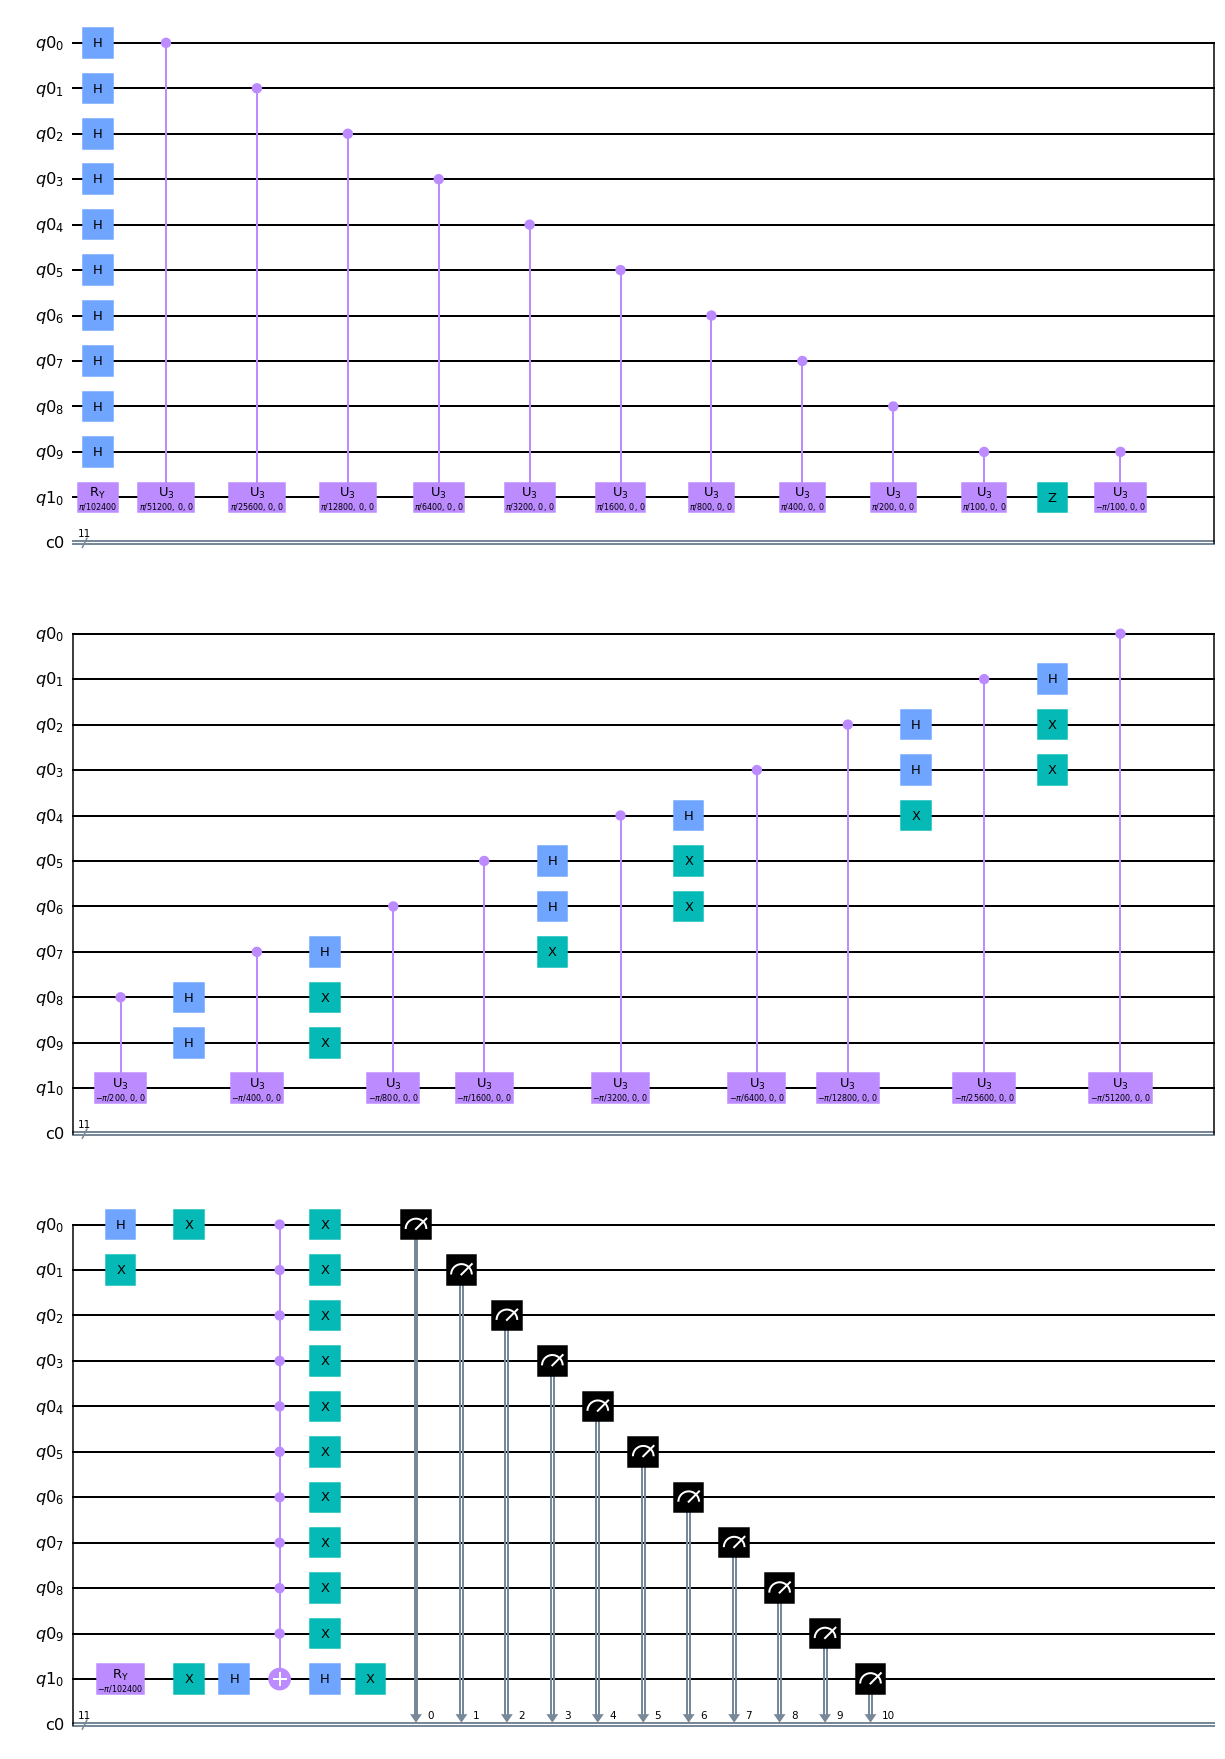

In [6]:
qc_list = create_grover_circuit([1], nbit, b_max)
my_style = {'usepiformat': True, 'cregbundle': True,'compress': True }
qc_list[0].draw(output="mpl", style=my_style, plot_barriers=False )

## Testing the algorithm with simulators

Let us run the algorithm with simulators

In [7]:
#setting the number of shots and Grover operators.

# number_grover_list = [0, 1, 2, 4, 8, 16, 32] # , 64, 128, 256]  # list of number of Grover operators
number_grover_list = [i for i in range(100)]
shots_list = [100] * len(number_grover_list) # list of number of shots
if len(shots_list) != len(number_grover_list):
    raise Exception(
        'The length of shots_list should be equal to the length of number_grover_list.'
    )

backend = Aer.get_backend('qasm_simulator')

In [8]:
noise_model = NoiseModel()
for qi in range(nbit+1):
    if qi >= 0:
        read_err = ReadoutError([[0.990, 0.010],[0.010,0.990]])
        noise_model.add_readout_error(read_err, [qi])

Finally, we can run the algorithm as below: 

In [9]:
# qc_list = create_grover_circuit(number_grover_list, nbit,b_max)  # list of Grover circuits

In [10]:
# counts_list = run_grover(qc_list, number_grover_list, shots_list, backend, noise_model=noise_model)  # list of number of grover operators

0 th round with 0 oracles
0.07987618446350098 s
1 th round with 1 oracles
0.1284496784210205 s
2 th round with 2 oracles
0.22076797485351562 s
3 th round with 3 oracles
0.29951000213623047 s
4 th round with 4 oracles
0.41156792640686035 s
5 th round with 5 oracles
0.5052196979522705 s
6 th round with 6 oracles
0.5742778778076172 s
7 th round with 7 oracles
0.6296939849853516 s
8 th round with 8 oracles
0.7015681266784668 s
9 th round with 9 oracles
0.7744052410125732 s
10 th round with 10 oracles
0.868927001953125 s
11 th round with 11 oracles
0.9559600353240967 s
12 th round with 12 oracles
1.024850845336914 s
13 th round with 13 oracles
1.1026890277862549 s
14 th round with 14 oracles
1.2033343315124512 s
15 th round with 15 oracles
1.3293330669403076 s
16 th round with 16 oracles
1.3467540740966797 s
17 th round with 17 oracles
1.4799439907073975 s
18 th round with 18 oracles
1.663059949874878 s
19 th round with 19 oracles
1.7342438697814941 s
20 th round with 20 oracles
1.789326906

KeyboardInterrupt: 

In [15]:
# import pickle
# with open("raw_result_10_001_001.pkl", "wb") as f:
#     pickle.dump(counts_list, f)

In [11]:
import pickle
with open("raw_result_10_001_001.pkl", "rb") as f:
    counts_list = pickle.load(f)

In [12]:
hit_list = make_hit_list(counts_list)
print(hit_list)

[89, 89, 89, 92, 88, 80, 87, 85, 81, 85, 85, 75, 76, 75, 77, 53, 67, 63, 55, 61, 51, 40, 47, 42, 40, 38, 23, 25, 29, 20, 19, 23, 11, 8, 14, 7, 5, 3, 3, 5, 4, 2, 1, 0, 2, 1, 0, 1, 3, 4, 7, 4, 10, 15, 8, 13, 21, 17, 20, 25, 29, 35, 29, 37, 40, 48, 53, 51, 58, 53, 59, 57, 62, 69, 69, 77, 75, 79, 85, 76, 83, 81, 87, 86, 89, 89, 87, 94, 91, 90, 83, 84, 91, 80, 82, 80, 76, 74, 80, 76]


In [13]:
shots = 8192
qr = QuantumRegister(nbit+1)
mit_pattern = [[i] for i in range(nbit+1)]
meas_calibs, state_labels = tensored_meas_cal(mit_pattern=mit_pattern, qr=qr, circlabel='mcal')
job = execute(meas_calibs, backend=Aer.get_backend('qasm_simulator'), shots=shots, noise_model=noise_model)
cal_results = job.result()
meas_fitter = TensoredMeasFitter(cal_results, mit_pattern=mit_pattern)

In [30]:
ts_sgs = []
meas_filter = InvSGS(nbit+1, meas_fitter.cal_matrices, mit_pattern)
mit_counts_list = []
for counts in counts_list:
    t1 = time.time()
    x_tilde = meas_filter.apply(counts)
    t2 = time.time()
    ts_sgs.append(t2 - t1)
    mit_counts_list.append(x_tilde)
mit_hit_list = make_hit_list(mit_counts_list)
print(mit_hit_list)

strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000018
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.000000000000002
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999997
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999994
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000016
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000018
number of positive values:  1025
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000009
number of positive values:  1024
main process: Done!
strict 

sum of mitigated probability vector x: 1.0000000000000022
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000009
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000029
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000007
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000033
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000022
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000024
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of

In [31]:
ts_lm0_sgs = []
meas_filter = InvSLM0SGS(nbit+1, meas_fitter.cal_matrices, mit_pattern)
x_tilde_S_lm_0_list = []
for counts in counts_list:
    t1 = time.time()
    x_tilde = meas_filter.apply(counts)
    t2 = time.time()
    ts_lm0_sgs.append(t2 - t1)
    x_tilde_S_lm_0_list.append(x_tilde)
mit_hit_S_lm_0_list = make_hit_list(x_tilde_S_lm_0_list)
print(mit_hit_S_lm_0_list)

Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.0344921735667814
sum of mitigated probability vector x_hat_s: 1.034502809286199
0.005193948745727539 s
number of positive values:  7
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.0472636250512852
sum of mitigated probability vector x_hat_s: 1.0472740870294028
0.005242824554443359 s
number of positive values:  9
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.0479465773470613
sum of mitigated probability vector x_hat_s: 1.0479561150468573
0.0037908554077148438 s
number of positive values:  7
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.0554934359965455
sum of mitigated probability vector x_hat_s: 1.0555024360402272
0.003595113754272461 s
nu

sum of mitigated probability vector x_s: 1.047890326712417
sum of mitigated probability vector x_hat_s: 1.047905309395505
0.00719904899597168 s
number of positive values:  13
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.04293468509706
sum of mitigated probability vector x_hat_s: 1.0429540798309396
0.010518074035644531 s
number of positive values:  18
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.0713808309349206
sum of mitigated probability vector x_hat_s: 1.071389020838509
0.007004976272583008 s
number of positive values:  9
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.055803454104271
sum of mitigated probability vector x_hat_s: 1.0558164173076534
0.010251998901367188 s
number of positive values:  12
main process: Done!
Restriction to labels

sum of mitigated probability vector x_s: 1.0744480333092348
sum of mitigated probability vector x_hat_s: 1.0744593675407326
0.005469083786010742 s
number of positive values:  12
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.0727226367869278
sum of mitigated probability vector x_hat_s: 1.0727376773702615
0.004987001419067383 s
number of positive values:  12
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.073324472056759
sum of mitigated probability vector x_hat_s: 1.0733363707290602
0.004090070724487305 s
number of positive values:  11
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.0922899666750525
sum of mitigated probability vector x_hat_s: 1.0922983083351046
0.002062082290649414 s
number of positive values:  7
main process: Done!
Restriction to 

In [13]:
meas_filter = InvSLMkSGS(nbit+1, meas_fitter.cal_matrices, mit_pattern)
x_tilde_S_lmk_list = []
for counts in counts_list:
    x_tilde = meas_filter.apply(counts, k=100)
    x_tilde_S_lmk_list.append(x_tilde)
mit_hit_S_lmk_list = make_hit_list(x_tilde_S_lmk_list)
print(mit_hit_S_lmk_list)

Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.0367178263392598
sum of mitigated probability vector x_hat_s: 1.0367039692939666
number of positive values:  8
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.0482807018183335
sum of mitigated probability vector x_hat_s: 1.0482665027847746
number of positive values:  9
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.0456007075572396
sum of mitigated probability vector x_hat_s: 1.0455889351416674
number of positive values:  7
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.0595476282264442
sum of mitigated probability vector x_hat_s: 1.0595364039471342
number of positive values:  8
main process: Done!
Restriction to labels of y + Lagrange Multip

sum of mitigated probability vector x_hat_s: 1.0557912427970317
number of positive values:  12
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.061673949268438
sum of mitigated probability vector x_hat_s: 1.061642975209259
number of positive values:  11
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.062739252699066
sum of mitigated probability vector x_hat_s: 1.0627066909290412
number of positive values:  12
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.0490337039314552
sum of mitigated probability vector x_hat_s: 1.0490007679258775
number of positive values:  12
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.069664968134031
sum of mitigated probability vector x_hat_s:

sum of mitigated probability vector x_hat_s: 1.0771109207126675
number of positive values:  11
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.055996037799139
sum of mitigated probability vector x_hat_s: 1.05597240090638
number of positive values:  13
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.0573664739031674
sum of mitigated probability vector x_hat_s: 1.0573397059722183
number of positive values:  16
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.0438839731735303
sum of mitigated probability vector x_hat_s: 1.0438633427943096
number of positive values:  12
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.0451521105408716
sum of mitigated probability vector x_hat_s

In [32]:
ts_mooney100 = []
meas_filter = MooneyEtal(nbit+1, meas_fitter.cal_matrices, mit_pattern)
x_tilde_mooney_list = []
for counts in counts_list:
    t1 = time.time()
    x_tilde = meas_filter.apply(counts, threshold=1/100)
    t2 = time.time()
    ts_mooney100.append(t2 - t1)
    x_tilde_mooney_list.append(x_tilde)
mit_hit_mooney100_list = make_hit_list(x_tilde_mooney_list)
print(mit_hit_mooney100_list)

The heuristcs by Mooney et al. + SGS algorithm
{10: 0.01110073920755918, 512: 0.013857724002787942, 16: 0.011966487152144512, 0: 0.9967381885611064}
sum of counts: 1.033663138923598
0.002332925796508789 s
number of positive values:  4
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{72: 0.010823002926248616, 544: 0.01123768558086218, 8: 0.021652095604174054, 0: 0.9968694757354116}
sum of counts: 1.0405822598466965
0.0025207996368408203 s
number of positive values:  4
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1: 0.012083812606963293, 32: 0.02368741639573279, 0: 0.9966429786610029}
sum of counts: 1.032414207663699
0.0014891624450683594 s
number of positive values:  3
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1536: 0.011102390476410585, 16: 0.011612388313260372, 0: 1.030756942209035}
sum of counts: 1.053471720998706
0.0014629364013671875 s
number of positive values:  3
main process: Done!
The heuristcs by Mooney et al.

number of positive values:  4
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1536: 0.010427760599049247, 516: 0.01110584383686517, 64: 0.012921699344221917, 16: 0.024353451023625385, 0: 0.8837532401422876, 1024: 0.07774226834206678}
sum of counts: 1.020304263288116
0.001569986343383789 s
number of positive values:  6
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{10: 0.011216948341835719, 1280: 0.010795335032799037, 1536: 0.021916129135251435, 128: 0.013394188465909488, 0: 0.9519603405183898, 1024: 0.043222969795414984, 18: 0.011237730731303058}
sum of counts: 1.0637436420209034
0.002707958221435547 s
number of positive values:  7
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{256: 0.016284652792700072, 32: 0.013809185544781692, 64: 0.013165514730966608, 1024: 0.0892151700489534, 96: 0.010840755384406169, 1536: 0.021530368051090067, 0: 0.8498822953078295}
sum of counts: 1.0147279418607276
0.0015571117401123047 s
number of p

In [33]:
ts_mooney10 = []
meas_filter = MooneyEtal(nbit+1, meas_fitter.cal_matrices, mit_pattern)
x_tilde_mooney_list = []
for counts in counts_list:
    t1 = time.time()
    x_tilde = meas_filter.apply(counts, threshold=1/10)
    t2 = time.time()
    ts_mooney10.append(t2 - t1)
    x_tilde_mooney_list.append(x_tilde)
mit_hit_mooney10_list = make_hit_list(x_tilde_mooney_list)
print(mit_hit_mooney10_list)

The heuristcs by Mooney et al. + SGS algorithm
{0: 0.9979376546430087}
sum of counts: 0.9979376546430087
0.0004870891571044922 s
number of positive values:  1
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.9979376546430087}
sum of counts: 0.9979376546430087
0.0007140636444091797 s
number of positive values:  1
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.997710910333221}
sum of counts: 0.997710910333221
0.0007097721099853516 s
number of positive values:  1
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 1.0315760025523235}
sum of counts: 1.0315760025523235
0.0006511211395263672 s
number of positive values:  1
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0

{0: 0.8521714803693107}
sum of counts: 0.8521714803693107
0.04619479179382324 s
number of positive values:  1
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.9306609588243788}
sum of counts: 0.9306609588243788
0.00028896331787109375 s
number of positive values:  1
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.9080086492417145}
sum of counts: 0.9080086492417145
0.0010559558868408203 s
number of positive values:  1
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.9753987172152383}
sum of counts: 0.9753987172152383
0.0011208057403564453 s
number of positive values:  1
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Moo

In [34]:
ts_scipy = []
meas_filter = InvSSciPy(nbit+1, meas_fitter.cal_matrices, mit_pattern)
x_tilde_S_SciPy_list = []
for counts in counts_list:
    t1 = time.time()
    x_tilde = meas_filter.apply(counts)
    t2 = time.time()
    ts_scipy.append(t2 - t1)
    x_tilde_S_SciPy_list.append(x_tilde)
mit_hit_S_SciPy_list = make_hit_list(x_tilde_S_SciPy_list)
print(mit_hit_S_SciPy_list)

Restriction to labels of y + SGS algorithm
sum of mitigated probability vector x_s: 1.0344921735667814
main process: Done!
Restriction to labels of y + SGS algorithm
sum of mitigated probability vector x_s: 1.0472636250512852
main process: Done!
Restriction to labels of y + SGS algorithm
sum of mitigated probability vector x_s: 1.0479465773470613
main process: Done!
Restriction to labels of y + SGS algorithm
sum of mitigated probability vector x_s: 1.0554934359965455
main process: Done!
Restriction to labels of y + SGS algorithm
sum of mitigated probability vector x_s: 1.043764411440582
main process: Done!
Restriction to labels of y + SGS algorithm
sum of mitigated probability vector x_s: 1.0164242249029818
main process: Done!
Restriction to labels of y + SGS algorithm
sum of mitigated probability vector x_s: 1.063841936862467
main process: Done!
Restriction to labels of y + SGS algorithm
sum of mitigated probability vector x_s: 1.038525545888377
main process: Done!
Restriction to labe

main process: Done!
Restriction to labels of y + SGS algorithm
sum of mitigated probability vector x_s: 1.047720410055235
main process: Done!
Restriction to labels of y + SGS algorithm
sum of mitigated probability vector x_s: 1.0810713564723475
main process: Done!
Restriction to labels of y + SGS algorithm
sum of mitigated probability vector x_s: 1.0437626588215436
main process: Done!
Restriction to labels of y + SGS algorithm
sum of mitigated probability vector x_s: 1.0698739604660248
main process: Done!
Restriction to labels of y + SGS algorithm
sum of mitigated probability vector x_s: 1.0363404634930022
main process: Done!
Restriction to labels of y + SGS algorithm
sum of mitigated probability vector x_s: 1.0599460403080017
main process: Done!
Restriction to labels of y + SGS algorithm
sum of mitigated probability vector x_s: 1.0442966126117184
main process: Done!
Restriction to labels of y + SGS algorithm
sum of mitigated probability vector x_s: 1.0492852380552906
main process: Don

In [35]:
ts_scipy_sgs = []
meas_filter = InvSSciPySGS(nbit+1, meas_fitter.cal_matrices, mit_pattern)
x_tilde_S_SciPy_SGS_list = []
for counts in counts_list:
    t1 = time.time()
    x_tilde = meas_filter.apply(counts)
    t2 = time.time()
    ts_scipy_sgs.append(t2 - t1)
    x_tilde_S_SciPy_SGS_list.append(x_tilde)
mit_hit_S_SciPy_SGS_list = make_hit_list(x_tilde_S_SciPy_SGS_list)
print(mit_hit_S_SciPy_SGS_list)

Restriction to labels of y + SGS algorithm
sum of mitigated probability vector x_s: 1.0344921735667814
number of positive values:  4
main process: Done!
Restriction to labels of y + SGS algorithm
sum of mitigated probability vector x_s: 1.0472636250512852
number of positive values:  4
main process: Done!
Restriction to labels of y + SGS algorithm
sum of mitigated probability vector x_s: 1.0479465773470613
number of positive values:  4
main process: Done!
Restriction to labels of y + SGS algorithm
sum of mitigated probability vector x_s: 1.0554934359965455
number of positive values:  3
main process: Done!
Restriction to labels of y + SGS algorithm
sum of mitigated probability vector x_s: 1.043764411440582
number of positive values:  4
main process: Done!
Restriction to labels of y + SGS algorithm
sum of mitigated probability vector x_s: 1.0164242249029818
number of positive values:  12
main process: Done!
Restriction to labels of y + SGS algorithm
sum of mitigated probability vector x_s

number of positive values:  7
main process: Done!
Restriction to labels of y + SGS algorithm
sum of mitigated probability vector x_s: 1.0431155271625583
number of positive values:  17
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
Restriction to labels of y + SGS algorithm
sum of mitigated probability vector x_s: 1.0731633480489797
number of positive values:  6
main process: Done!
Restriction to labels of y + SGS algorithm
sum of mitigated probability vector x_s: 1.064438523458579
number of positive values:  6
main process: Done!
Restriction to labels of y + SGS algorithm
sum of mitigated probability vector x_s: 1.0778847952523918
number of positive values:  9
main process: Done!
Restriction to labels of y + SGS algorithm
sum of mitigated probability vector x_s: 1.0625180403630907
number of positive values:  7
main process: Done!
Restriction to labels of y + SGS algorithm
sum of mitigated probability vector x_s: 1.0695082828889637
numb

In [25]:
import pickle
with open("hit_list_10_001_001.pkl", "wb") as f:
    pickle.dump(hit_list, f)

In [24]:
import pickle
with open("mit_hit_list_10_001_001.pkl", "wb") as f:
    pickle.dump(mit_hit_list, f)

In [23]:
"""
import pickle
with open("mit_hit_S_list_10_001_001.pkl", "wb") as f:
    pickle.dump(mit_hit_S_list, f)
"""

In [19]:
import pickle
with open("mit_hit_S_lm_0_list_10_001_001.pkl", "wb")as f:
    pickle.dump(mit_hit_S_lm_0_list, f)

In [88]:
import pickle
with open("mit_hit_S_lmk_list_10_001_001.pkl", "wb")as f:
    pickle.dump(mit_hit_S_lmk_list, f)

In [15]:
import pickle
with open("mit_hit_mooney100_list_10_001_001.pkl", "wb") as f:
    pickle.dump(mit_hit_mooney_list, f)

In [21]:
with open("hit_list_10_001_001.pkl", "rb") as f:
    hit_list = pickle.load(f)
with open("mit_hit_list_10_001_001.pkl", "rb") as f:
    mit_hit_list = pickle.load(f)
with open("mit_hit_S_list_10_001_001.pkl", "rb") as f:
    mit_hit_S_list = pickle.load(f)
with open("mit_hit_S_lm_0_list_10_001_001.pkl", "rb") as f:
    mit_hit_S_lm_0_list = pickle.load(f)
with open("mit_hit_mooney100_list_10_001_001.pkl", "rb") as f:
    mit_hit_S_lm_0_list = pickle.load(f)

Text(0, 0.5, 'number of shots for $|00...0>$')

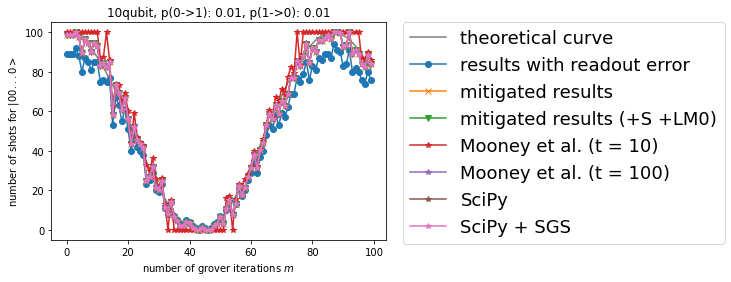

In [27]:
divide = 100
number_grover_list = [i for i in range(100)]
plt.plot(np.linspace(0,number_grover_list[-1], divide), 
         100 * np.cos(2 * np.linspace(0,number_grover_list[-1], divide) * np.arccos(np.sqrt(discretizedResult))) ** 2, 
         label="theoretical curve", color="C7")
plt.plot(number_grover_list, hit_list, marker="o", label="results with readout error", color="C0")
plt.plot(number_grover_list, mit_hit_list, marker="x", label="mitigated results", color="C1")
plt.plot(number_grover_list, mit_hit_S_lm_0_list, marker="v", label="mitigated results (+S +LM0)", color="C2")
plt.plot(number_grover_list, mit_hit_mooney10_list, marker="*", label="Mooney et al. (t = 10)", color="C3")
plt.plot(number_grover_list, mit_hit_mooney100_list, marker="*", label="Mooney et al. (t = 100)", color="C4")
plt.plot(number_grover_list, mit_hit_S_SciPy_list, marker="*", label="SciPy", color="C5")
plt.plot(number_grover_list, mit_hit_S_SciPy_SGS_list, marker="*", label="SciPy + SGS", color="C6")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)
plt.title("10qubit, p(0->1): 0.01, p(1->0): 0.01")
plt.xlabel("number of grover iterations $m$")
plt.ylabel("number of shots for $|00...0>$")

# Afterwards

In [23]:
sin_hit_list = [100 - h for h in hit_list]
sin_mit_hit_list = [100 - h for h in mit_hit_list]
sin_mit_hit_S_lm_0_list = [100 - h for h in mit_hit_S_lm_0_list]
sin_mit_hit_mooney100_list = [100 - h for h in mit_hit_mooney100_list]
sin_mit_hit_mooney10_list = [100 - h for h in mit_hit_mooney10_list]
sin_mit_hit_S_SciPy_list = [100 - h for h in mit_hit_S_SciPy_list]
sin_mit_hit_S_SciPy_SGS_list = [100 - h for h in mit_hit_S_SciPy_SGS_list]

thetaCandidate_list = calculate_theta(
    sin_hit_list, number_grover_list, shots_list)  # list of estimated theta values
thetaCandidate_mit_list = calculate_theta(
    sin_mit_hit_list, number_grover_list, shots_list)  # list of estimated theta values
thetaCandidate_mit_S_lm_0_list = calculate_theta(
    sin_mit_hit_S_lm_0_list, number_grover_list, shots_list)  # list of estimated theta values
thetaCandidate_mit_mooney100_list = calculate_theta(
    sin_mit_hit_mooney100_list, number_grover_list, shots_list)  # list of estimated theta values
thetaCandidate_mit_mooney10_list = calculate_theta(
    sin_mit_hit_mooney10_list, number_grover_list, shots_list)  # list of estimated theta values
thetaCandidate_mit_S_SciPy_list = calculate_theta(
    sin_mit_hit_S_SciPy_list, number_grover_list, shots_list)  # list of estimated theta values
thetaCandidate_mit_S_SciPy_SGS_list = calculate_theta(
    sin_mit_hit_S_SciPy_SGS_list, number_grover_list, shots_list)  # list of estimated theta values

error_list = np.abs(np.sin(thetaCandidate_list)**2 - discretizedResult)  # list of estimation errors
error_mit_list = np.abs(np.sin(thetaCandidate_mit_list)**2 - discretizedResult)  # list of estimation errors
error_mit_S_lm_0_list = np.abs(np.sin(thetaCandidate_mit_S_lm_0_list)**2 - discretizedResult)  # list of estimation errors
error_mit_mooney100_list = np.abs(np.sin(thetaCandidate_mit_mooney100_list)**2 - discretizedResult)  # list of estimation errors
error_mit_mooney10_list = np.abs(np.sin(thetaCandidate_mit_mooney10_list)**2 - discretizedResult)  # list of estimation errors
error_mit_S_SciPy_list = np.abs(np.sin(thetaCandidate_mit_S_SciPy_list)**2 - discretizedResult)  # list of estimation errors
error_mit_S_SciPy_SGS_list = np.abs(np.sin(thetaCandidate_mit_S_SciPy_SGS_list)**2 - discretizedResult)  # list of estimation errors
OracleCall_list = []  # list of number of oracle calls
ErrorCramérRao_list = []  # list of Cramér-Rao lower bound
for i in range(len(number_grover_list)):
    OracleCall_list.append(
        CalcNumberOracleCalls(i, shots_list, number_grover_list))
    ErrorCramérRao_list.append(
        CalcErrorCramérRao(i, shots_list, discretizedResult, number_grover_list))

../libmitigation/lib_grover.py:230: RuntimeWarning: invalid value encountered in sqrt
  theta = np.arcsin(np.sqrt(p))  # search theta


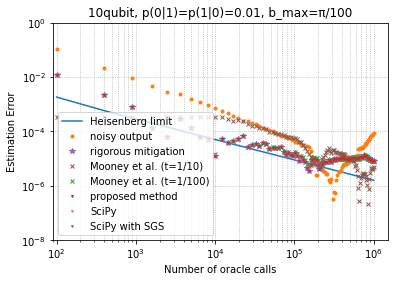

In [28]:
plt.clf()
p = plt.loglog( OracleCall_list, ErrorCramérRao_list)
p0 = plt.loglog( OracleCall_list, error_list, 'o', markersize=3)
p1 = plt.loglog( OracleCall_list, error_mit_list, '*', color='C4', markersize=6)
p2 = plt.loglog( OracleCall_list, error_mit_mooney100_list, 'x', color='C2', markersize=4)
p4 = plt.loglog( OracleCall_list, error_mit_mooney10_list, 'x', color='C5', markersize=4)
p5 = plt.loglog( OracleCall_list, error_mit_S_SciPy_list, 'v', color='C6', markersize=2)
p6 = plt.loglog( OracleCall_list, error_mit_S_SciPy_SGS_list, 'v', color='C7', markersize=2)
p3 = plt.loglog( OracleCall_list, error_mit_S_lm_0_list, 'v', color='C3', markersize=2)

plt.title("10qubit, p(0|1)=p(1|0)=0.01, b_max=π/100")
plt.xlim(OracleCall_list[0]*0.9, OracleCall_list[-1]*1.5)
plt.xlabel("Number of oracle calls")
plt.ylim(0.00000001, 1)
plt.ylabel("Estimation Error")
plt.grid(True, which="both", ls="dotted")
plt.legend((p[0], p0[0], p1[0], p4[0], p2[0], p3[0], p5[0], p6[0]), 
           ("Heisenberg limit", "noisy output", "rigorous mitigation", "Mooney et al. (t=1/10)", "Mooney et al. (t=1/100)", "proposed method", "SciPy", "SciPy with SGS"))
plt.show()

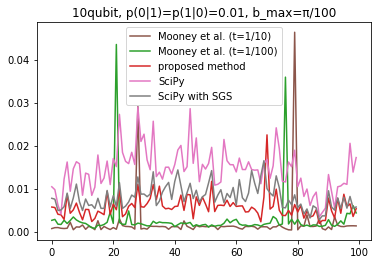

In [36]:
plt.clf()
p4 = plt.plot(ts_mooney10, color="C5")
p2 = plt.plot(ts_mooney100, color="C2")
p3 = plt.plot(ts_lm0_sgs, color="C3")
p5 = plt.plot(ts_scipy, color="C6")
p6 = plt.plot(ts_scipy_sgs, color="C7")
plt.title("10qubit, p(0|1)=p(1|0)=0.01, b_max=π/100")
plt.legend((p4[0], p2[0], p3[0], p5[0], p6[0]),
           ("Mooney et al. (t=1/10)", "Mooney et al. (t=1/100)", "proposed method", "SciPy", "SciPy with SGS"))
plt.show()